# PCA
### Aprendizagem Automática e Ciências de Dados

### !NÃO ESTÁ FEITO PARA O DATAFRAME CERTO!


In [1]:
%reset -f

## Requirements

In [2]:
pip install -r requirements.txt

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)


## Imports

In [3]:
!pip install --upgrade statsmodels


  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4


In [4]:
!pip install miceforest

  Using cached miceforest-6.0.5-py3-none-any.whl.metadata (34 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached pyarrow-22.0.0-cp313-cp313-win_amd64.whl.metadata (3.3 kB)
Using cached miceforest-6.0.5-py3-none-any.whl (38 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Using cached pyarrow-22.0.0-cp313-cp313-win_amd64.whl (28.0 MB)

   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------------------- 0/3 [pyarrow]
   ---------------------------

In [5]:
!pip install pingouin
!pip install --upgrade pingouin


  Using cached pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached pingouin-0.5.5-py3-none-any.whl (204 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 28.6 MB/s  0:00:00

   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xarray]
   ---------- ----------------------------- 1/4 [xa

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import pingouin as pg

from scipy.spatial import distance
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler


import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import PowerTransformer

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit

from scipy.stats import skew, kurtosis


## Data Reading

In [3]:
df = pd.read_csv('../datasets/data.csv')
df

,Study Hours per Week,Class Attendance (%),GPA (0–4),Motivation Score (1–10),Stress Level (1–10),Sleep Quality (1–10),Physical Activity (hours/week),Social Engagement (1–10),Peer Support Score (1–10),Faculty Support Score (1–10),Campus Facilities Score (1–10),Career Preparedness (1–10),Financial Pressure (1–10),Part-time Work Hours,Life Satisfaction (1–10)
0,10.882139,5508.922322,NaN,5.635315,6.055634,3.377507,2.624843,7.640276,7.261843,3.722652,6.204469,5.326003,6.935581,14.052124,NaN
1,11.061797,5394.638265,4.792789,4.235726,5.619514,4.290918,1.171270,5.284750,6.140126,3.515834,4.892440,6.715028,NaN,13.970185,7.946641
2,11.806999,5394.525697,4.975698,7.570411,4.960441,6.058478,3.508715,6.313634,NaN,4.361389,5.350657,6.082891,6.274488,16.408453,8.260324
3,10.938470,5631.161180,3.827380,4.398015,4.594414,NaN,4.255391,5.832624,6.319620,3.069801,6.195344,6.447721,7.349671,15.896196,7.759531
4,12.321440,5389.234426,6.507852,5.023511,NaN,5.348651,1.814652,6.389872,7.271372,5.330841,6.165005,6.247761,6.439657,14.319952,8.557836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.303455,5428.443710,3.150505,5.913459,6.119253,NaN,4.275799,5.199936,7.377372,4.006940,5.485776,7.797681,7.193301,NaN,8.239536
296,12.004887,5463.234909,4.892192,4.342250,4.195630,NaN,2.953648,6.499669,5.816083,3.830180,NaN,6.619735,8.159539,18.482875,7.349410
297,10.323984,5536.662963,3.053253,4.209329,NaN,5.911817,3.518351,6.133458,6.560241,3.756402,5.436307,5.578911,6.838079,17.337071,6.991773
298,11.857247,5359.091920,6.414147,4.847727,5.264098,6.307620,2.657462,6.585104,6.653686,4.057997,6.374787,4.280973,6.552096,15.618854,8.745521


#### **Gráfico Valores NAN**

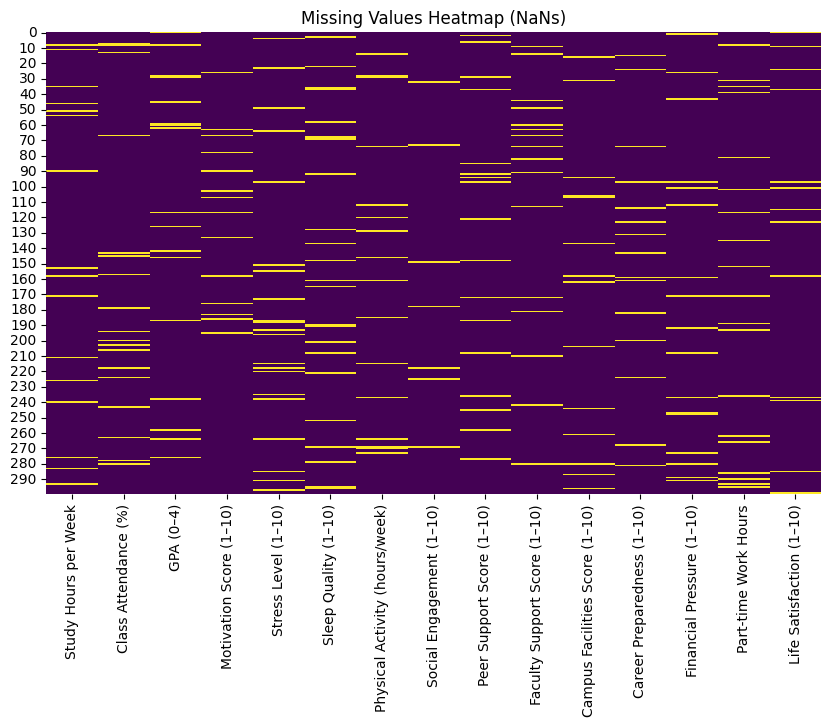

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (NaNs)')
plt.show()

#### Quantidade de NAN por coluna

In [5]:
df.isna().sum()


Study Hours per Week              16
Class Attendance (%)              18
GPA (0–4)                         17
Motivation Score (1–10)           14
Stress Level (1–10)               21
Sleep Quality (1–10)              23
Physical Activity (hours/week)    16
Social Engagement (1–10)           7
Peer Support Score (1–10)         17
Faculty Support Score (1–10)      16
Campus Facilities Score (1–10)    14
Career Preparedness (1–10)        15
Financial Pressure (1–10)         17
Part-time Work Hours              19
Life Satisfaction (1–10)          13
dtype: int64

### Máximos e Mínimos de Cada Coluna

In [6]:
for coluna in df.columns:
    max_value = df[coluna].max()
    min_value = df[coluna].min()
    print(f"Column: {coluna}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}\n")

Column: Study Hours per Week
  Max: 35.80226198151666
  Min: 9.20024802764496

Column: Class Attendance (%)
  Max: 16519.81723501039
  Min: 5080.6312588897645

Column: GPA (0–4)
  Max: 18.49647789149561
  Min: 1.3892240924621144

Column: Motivation Score (1–10)
  Max: 21.478817467793053
  Min: 1.8168476457916285

Column: Stress Level (1–10)
  Max: 23.37089136217524
  Min: 3.342229827070574

Column: Sleep Quality (1–10)
  Max: 17.966959901337226
  Min: 2.1297970400915416

Column: Physical Activity (hours/week)
  Max: 11.682222756770756
  Min: 0.0708452545977028

Column: Social Engagement (1–10)
  Max: 23.32198101520199
  Min: 2.8734293791486283

Column: Peer Support Score (1–10)
  Max: 21.26405619501162
  Min: 3.2258768139742298

Column: Faculty Support Score (1–10)
  Max: 21.00502655584265
  Min: 1.2500036109633907

Column: Campus Facilities Score (1–10)
  Max: 16.55059727199906
  Min: 3.635989416668718

Column: Career Preparedness (1–10)
  Max: 25.333269213648524
  Min: 3.076737888689

## 1. OOR
### Tratar os valores "Out Of Range" do dataset

Como é possível ver nas células anteriores todas as colunas têm valores que ultrapassam os seu suposto intervalo, assim é necessário formatar os dados para que estejam inseridos nos mesmos.

In [7]:
df.columns

Index(['Study Hours per Week', 'Class Attendance (%)', 'GPA (0–4)',
       'Motivation Score (1–10)', 'Stress Level (1–10)',
       'Sleep Quality (1–10)', 'Physical Activity (hours/week)',
       'Social Engagement (1–10)', 'Peer Support Score (1–10)',
       'Faculty Support Score (1–10)', 'Campus Facilities Score (1–10)',
       'Career Preparedness (1–10)', 'Financial Pressure (1–10)',
       'Part-time Work Hours', 'Life Satisfaction (1–10)'],
      dtype='object')

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

Class attendance -- dividir pelo número máximo, neste caso 16519, e qualquer valor que ultrapasse tornar em NAN;

GPA -- Todos os valores acima de 4 colocar como NAN;

Como todas as restantes colunas têm um máximo teórico igual a 10, qualquer valor que o ultrapasse transformamos em NAN;
<br><br>

In [8]:
df['Class Attendance (%)'] = (df['Class Attendance (%)'] / df['Class Attendance (%)'].max()) * 100
df.loc[(df['GPA (0–4)'] > 4), 'GPA (0–4)'] = np.nan
df.loc[(df['Motivation Score (1–10)'] > 10), 'Motivation Score (1–10)'] = np.nan
df.loc[(df['Stress Level (1–10)'] > 10), 'Stress Level (1–10)'] = np.nan
df.loc[(df['Sleep Quality (1–10)'] > 10), 'Sleep Quality (1–10)'] = np.nan
df.loc[(df['Social Engagement (1–10)'] > 10), 'Social Engagement (1–10)'] = np.nan
df.loc[(df['Peer Support Score (1–10)'] > 10), 'Peer Support Score (1–10)'] = np.nan
df.loc[(df['Faculty Support Score (1–10)'] > 10), 'Faculty Support Score (1–10)'] = np.nan
df.loc[(df['Campus Facilities Score (1–10)'] > 10), 'Campus Facilities Score (1–10)'] = np.nan
df.loc[(df['Career Preparedness (1–10)'] > 10), 'Career Preparedness (1–10)'] = np.nan
df.loc[(df['Financial Pressure (1–10)'] > 10), 'Financial Pressure (1–10)'] = np.nan
df.loc[(df['Life Satisfaction (1–10)'] > 10), 'Life Satisfaction (1–10)'] = np.nan

df

,Study Hours per Week,Class Attendance (%),GPA (0–4),Motivation Score (1–10),Stress Level (1–10),Sleep Quality (1–10),Physical Activity (hours/week),Social Engagement (1–10),Peer Support Score (1–10),Faculty Support Score (1–10),Campus Facilities Score (1–10),Career Preparedness (1–10),Financial Pressure (1–10),Part-time Work Hours,Life Satisfaction (1–10)
0,10.882139,33.347356,NaN,5.635315,6.055634,3.377507,2.624843,7.640276,7.261843,3.722652,6.204469,5.326003,6.935581,14.052124,NaN
1,11.061797,32.655557,NaN,4.235726,5.619514,4.290918,1.171270,5.284750,6.140126,3.515834,4.892440,6.715028,NaN,13.970185,7.946641
2,11.806999,32.654875,NaN,7.570411,4.960441,6.058478,3.508715,6.313634,NaN,4.361389,5.350657,6.082891,6.274488,16.408453,8.260324
3,10.938470,34.087309,3.827380,4.398015,4.594414,NaN,4.255391,5.832624,6.319620,3.069801,6.195344,6.447721,7.349671,15.896196,7.759531
4,12.321440,32.622845,NaN,5.023511,NaN,5.348651,1.814652,6.389872,7.271372,5.330841,6.165005,6.247761,6.439657,14.319952,8.557836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.303455,32.860192,3.150505,5.913459,6.119253,NaN,4.275799,5.199936,7.377372,4.006940,5.485776,7.797681,7.193301,NaN,8.239536
296,12.004887,33.070795,NaN,4.342250,4.195630,NaN,2.953648,6.499669,5.816083,3.830180,NaN,6.619735,8.159539,18.482875,7.349410
297,10.323984,33.515280,3.053253,4.209329,NaN,5.911817,3.518351,6.133458,6.560241,3.756402,5.436307,5.578911,6.838079,17.337071,6.991773
298,11.857247,32.440383,NaN,4.847727,5.264098,6.307620,2.657462,6.585104,6.653686,4.057997,6.374787,4.280973,6.552096,15.618854,8.745521


## MISSINGS

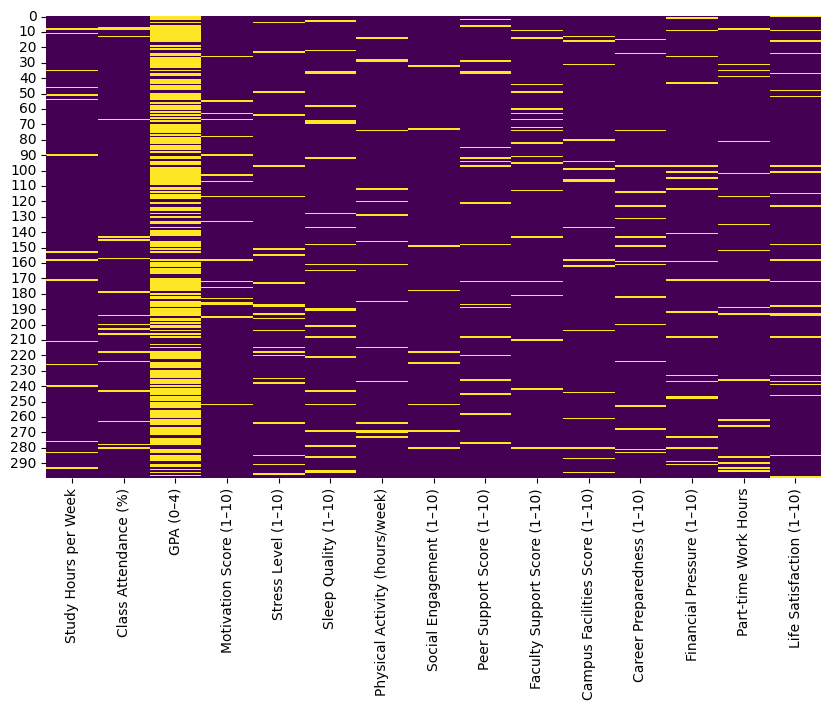

In [9]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [10]:
# número de NAN's atualizado
df.isna().sum()

Study Hours per Week               16
Class Attendance (%)               18
GPA (0–4)                         204
Motivation Score (1–10)            18
Stress Level (1–10)                23
Sleep Quality (1–10)               25
Physical Activity (hours/week)     16
Social Engagement (1–10)            9
Peer Support Score (1–10)          20
Faculty Support Score (1–10)       19
Campus Facilities Score (1–10)     17
Career Preparedness (1–10)         18
Financial Pressure (1–10)          21
Part-time Work Hours               19
Life Satisfaction (1–10)           24
dtype: int64

In [11]:
# Certificar de que não temos colunas vazias, se for esse o caso podemos retirá-las do dataframe

empty_cols = df.columns[df.isnull().all()]
print("Columns with all missing values:", list(empty_cols))

Columns with all missing values: []


In [12]:
df = df.drop(columns = empty_cols)

## 2. Imputation
### Predictive Mean Matching

Para realizarmos todas as operações inerentes ao dataframe precisamos que não existam valores NAN, um dos processos que podemos realizar para alterar os valores é o **"Predictive Mean Matching"**.

Consiste em:
1. Criar uma *regressão* com os valores não NAN para a coluna
2. Calcular estimativas para cada valor da coluna
3. Encontrar os *k neighbours* que tenham valores perto da estimativa calculada
4. Escolher um deles para ser o novo valor
5. Repetir para cada coluna

In [13]:
kernel = mf.ImputationKernel(
    df, 
    num_datasets =  1, 
    save_all_iterations_data = True, 
    random_state = 42
)

kernel.mice(5)

df_imp = kernel.complete_data(0) # Dataframe sem os valores NAN


In [14]:
df_imp.head()

,Study Hours per Week,Class Attendance (%),GPA (0–4),Motivation Score (1–10),Stress Level (1–10),Sleep Quality (1–10),Physical Activity (hours/week),Social Engagement (1–10),Peer Support Score (1–10),Faculty Support Score (1–10),Campus Facilities Score (1–10),Career Preparedness (1–10),Financial Pressure (1–10),Part-time Work Hours,Life Satisfaction (1–10)
0,10.882139,33.347356,3.746358,5.635315,6.055634,3.377507,2.624843,7.640276,7.261843,3.722652,6.204469,5.326003,6.935581,14.052124,8.248860
1,11.061797,32.655557,3.827380,4.235726,5.619514,4.290918,1.171270,5.284750,6.140126,3.515834,4.892440,6.715028,7.691990,13.970185,7.946641
2,11.806999,32.654875,3.269892,7.570411,4.960441,6.058478,3.508715,6.313634,6.572156,4.361389,5.350657,6.082891,6.274488,16.408453,8.260324
3,10.938470,34.087309,3.827380,4.398015,4.594414,5.650938,4.255391,5.832624,6.319620,3.069801,6.195344,6.447721,7.349671,15.896196,7.759531
4,12.321440,32.622845,3.827380,5.023511,5.354460,5.348651,1.814652,6.389872,7.271372,5.330841,6.165005,6.247761,6.439657,14.319952,8.557836


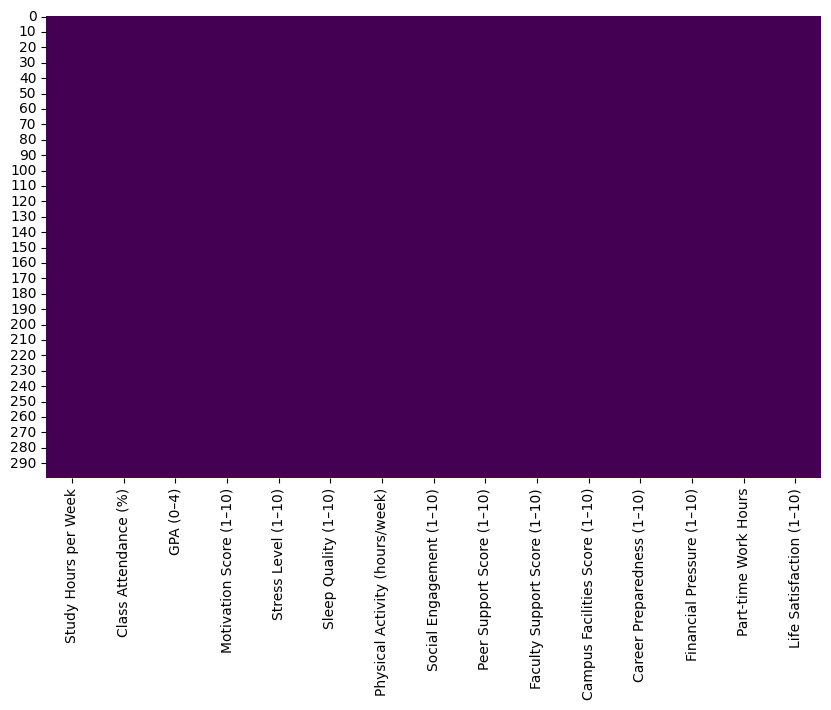

In [15]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [16]:
print("Valores NAN")
print("Antes:", df.isna().sum().sum())
print("Depois:", df_imp.isna().sum().sum())

Valores NAN
Antes: 467
Depois: 0


Depois de remover os valores *OOR* e substituir os valores *NAN* o dataset não tem mais valores "vazios" nem que não estejam contidos no intervalo desejado

## 3. Tratar Outliers

Após termos um dataset tratado existe a necessidade de corrigir certos valores que, por muito que estejam contidos nos intervalos desejados, têm valores irrealistas.

Para isso precisamos de testar a *normalidade multivariada* do dataset, através do **teste de Mardia**, se passar fazemos a distância clássica de Mahalanobis, caso contrário tentamos consertá-la com Yeo-johnson

Se precisarmos de realizar a normalização dos dados através do Yeo-johson, após estar concluída realizamos o teste outra vez, se não passar significa que a *data* não consegue ser normalizada e então temos de fazer a distância robusta de Mahalanobis.


### 3.1 Teste de Mardia

In [17]:
df_imp.dtypes
df_imp

,Study Hours per Week,Class Attendance (%),GPA (0–4),Motivation Score (1–10),Stress Level (1–10),Sleep Quality (1–10),Physical Activity (hours/week),Social Engagement (1–10),Peer Support Score (1–10),Faculty Support Score (1–10),Campus Facilities Score (1–10),Career Preparedness (1–10),Financial Pressure (1–10),Part-time Work Hours,Life Satisfaction (1–10)
0,10.882139,33.347356,3.746358,5.635315,6.055634,3.377507,2.624843,7.640276,7.261843,3.722652,6.204469,5.326003,6.935581,14.052124,8.248860
1,11.061797,32.655557,3.827380,4.235726,5.619514,4.290918,1.171270,5.284750,6.140126,3.515834,4.892440,6.715028,7.691990,13.970185,7.946641
2,11.806999,32.654875,3.269892,7.570411,4.960441,6.058478,3.508715,6.313634,6.572156,4.361389,5.350657,6.082891,6.274488,16.408453,8.260324
3,10.938470,34.087309,3.827380,4.398015,4.594414,5.650938,4.255391,5.832624,6.319620,3.069801,6.195344,6.447721,7.349671,15.896196,7.759531
4,12.321440,32.622845,3.827380,5.023511,5.354460,5.348651,1.814652,6.389872,7.271372,5.330841,6.165005,6.247761,6.439657,14.319952,8.557836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,10.303455,32.860192,3.150505,5.913459,6.119253,4.640209,4.275799,5.199936,7.377372,4.006940,5.485776,7.797681,7.193301,15.278139,8.239536
296,12.004887,33.070795,2.660798,4.342250,4.195630,7.499311,2.953648,6.499669,5.816083,3.830180,6.880385,6.619735,8.159539,18.482875,7.349410
297,10.323984,33.515280,3.053253,4.209329,5.518400,5.911817,3.518351,6.133458,6.560241,3.756402,5.436307,5.578911,6.838079,17.337071,6.991773
298,11.857247,32.440383,3.949103,4.847727,5.264098,6.307620,2.657462,6.585104,6.653686,4.057997,6.374787,4.280973,6.552096,15.618854,8.745521


In [18]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Test statistics
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia = mardia_test(df_imp)
print(mardia)

                Value  pval  normal
skewness   269.181029   0.0   False
kurtosis  4470.050000   0.0   False


Como os p-values estão igual a zero significa que o dataset não está normalizado, logo vamos ter de realizar a normalização através do Yeo-Johnson como referido anteriormente.

### 3.2 Yeo-Johson

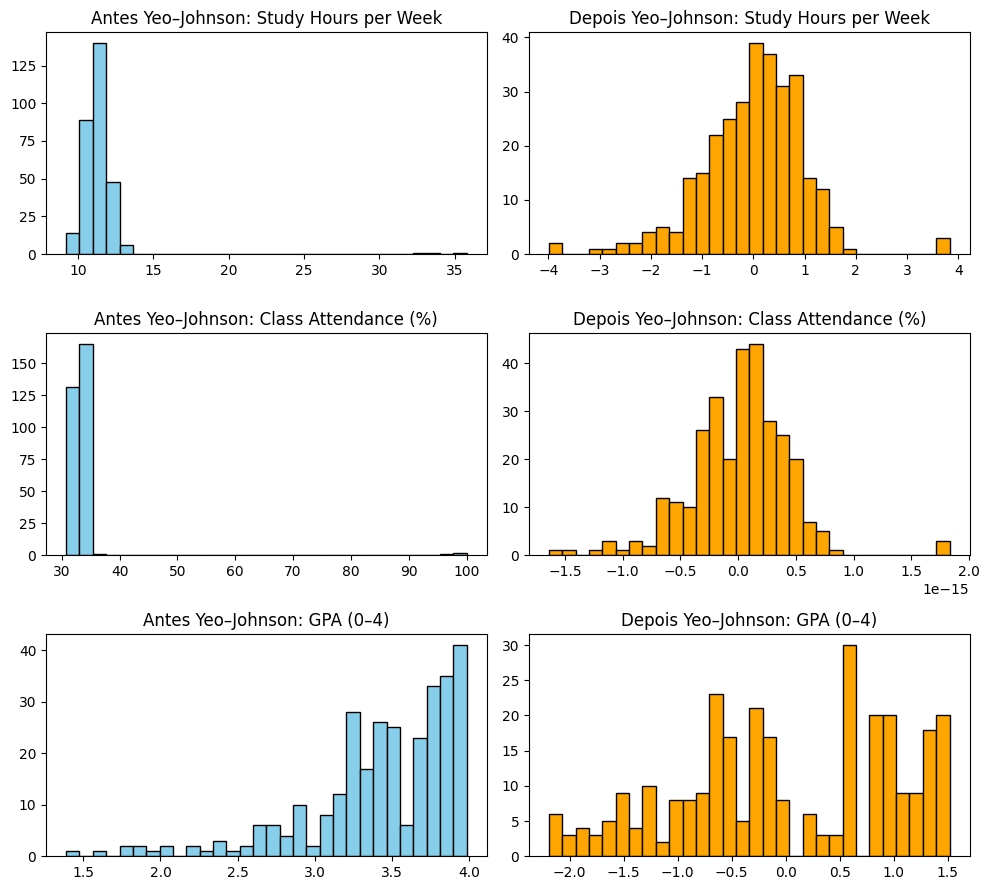

In [19]:
# Apply Yeo–Johnson transformation
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp)

# Convert back to DataFrame with same column names
imputed_df_yeojohnson = pd.DataFrame(transformed_data, columns=df_imp.columns)


# PLOTTING
cols_to_plot = ["Study Hours per Week", "Class Attendance (%)", "GPA (0–4)"]

fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(10, 3*len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    # Before
    axes[i, 0].hist(df_imp[col], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f"Antes Yeo–Johnson: {col}")

    # After
    axes[i, 1].hist(imputed_df_yeojohnson[col], bins=30, color='orange', edgecolor='black')
    axes[i, 1].set_title(f"Depois Yeo–Johnson: {col}")

plt.tight_layout()
plt.show()

Depois de aplicarmos o Yeo-Johnson voltamos a realizar o teste de Mardia.

In [20]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
                Value  pval  normal
skewness   269.181029   0.0   False
kurtosis  4470.050000   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness    23.869114   0.0   False
kurtosis  4470.050000   0.0   False


Como podemos ver os p-values mantêm-se iguais, o que significa que vamos ter de utilzar a disância robusta de Mahalanobis

### 3.3 Robust Mahalanobis Distance

A distância robusta de Mahalanobis minimiza o impacto que os outliars.

Para a calcular vamos utilizar o método MCD, *Minimum Covariance Determinant*,este funciona da seguinte forma:
1. Identifica *subsets* de *data* que estão mais concentrados
2. Calcula média e covariância do subset
3. Escolhe o subset que tenha a matriz de covariância com menor determinante



In [22]:
# Dataframe
X_full = df_imp.select_dtypes(include=[np.number]).dropna().to_numpy()

# Distâncias de Mahalanobis
robust_cov_before = MinCovDet().fit(X_full)

# Calcular as distâncias de Mahalanobis
robust_md = robust_cov_before.mahalanobis(X_full)

# Threshold
threshold = chi2.ppf(0.99, df=X_full.shape[1])

# Outlier mask 
outliers_mask = robust_md > threshold

# Filtrar outliers 
df_tratada = df_imp.loc[~outliers_mask].reset_index(drop=True)

# Covariancia depois de filtrar 
robust_cov_after = MinCovDet().fit(X_after)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Antes de filtrar - Dados não normalizados
ax = axes[0]
ax.plot(robust_md, label="Robust MD (MCD)", alpha=0.7)
ax.axhline(threshold, color="red", linestyle="--", label="Threshold (99%)")
ax.set_title("Distância de Mahalanobis Antes de Filtrar")
ax.set_xlabel("Observation Index")
ax.set_ylabel("Distance")
ax.legend()
ax.grid(True)

# Depois de Filtrar - Dados normalizados 
ax = axes[1]

robust_md_after = robust_cov_after.mahalanobis(X_after)

ax.plot(robust_md_after, label="Robust MD (Depois)", alpha=0.7)
ax.axhline(threshold, color="red", linestyle="--", label="Threshold (99%)")
ax.set_title("Distância de Mahalanobis Depois de Filtrar")
ax.set_xlabel("Observation Index")
ax.set_ylabel("Distance")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'X_after' is not defined

Como podemos reparar na figura da esquerda, que representa os valores da distãncia de Mahalanobis no dataset original, cada "pico" representa um outlier.

Já na figura da direita, com os valores da distância de Mahalanobis no dataset filtrado, existe muito menos "picos" estando a maioria dos valores dentro do threshold definido, qualquer valor acima de 99% é considerado como Outlier.

Daqui surge então o dataset sem os valores *Outliers*

Daqui surge o dataset sem os Outliers

In [23]:
df_tratada.describe()

,Study Hours per Week,Class Attendance (%),GPA (0–4),Motivation Score (1–10),Stress Level (1–10),Sleep Quality (1–10),Physical Activity (hours/week),Social Engagement (1–10),Peer Support Score (1–10),Faculty Support Score (1–10),Campus Facilities Score (1–10),Career Preparedness (1–10),Financial Pressure (1–10),Part-time Work Hours,Life Satisfaction (1–10)
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,11.344809,33.117803,3.525128,5.554282,5.709726,5.501775,3.340929,5.923776,6.038895,4.014653,6.168240,6.323503,7.392154,16.110461,8.044361
std,0.657871,0.776184,0.363783,1.256236,0.896577,1.220210,1.020570,0.933281,0.895084,0.993977,0.919696,1.049980,0.828815,1.636452,0.987972
min,9.631719,30.754767,2.355916,1.816848,3.342230,2.129797,0.070845,3.117608,3.964405,1.320245,3.635989,3.076738,5.366637,12.403526,5.421152
25%,10.896399,32.573416,3.277590,4.786529,5.076891,4.599430,2.679585,5.318694,5.358079,3.426454,5.468040,5.660263,6.775252,14.954065,7.402039
50%,11.302590,33.127717,3.548358,5.518112,5.634174,5.426276,3.302961,5.950991,6.132198,4.027833,6.232794,6.330012,7.435517,16.113777,8.083453
75%,11.771674,33.638662,3.827380,6.314922,6.280732,6.394684,4.098071,6.589719,6.639059,4.682031,6.743102,7.062243,7.980307,17.207982,8.779538
max,13.581769,35.074829,3.982558,8.844317,8.099534,8.235140,5.972157,8.273342,8.416923,6.505509,9.401969,9.260953,9.665001,20.537147,9.947191


## 4. PCA

Agora, e depois de concluído o tratamento de dados sobre o *dataset* original, vamos passar para o *PCA*, *Principal Component Analysis*, este vai reduzir a dimensão do *dataset* mantendo grande parte da sua informação original.

Funciona da seguinte forma:
1. Identifica a "direção" das variâncias máximas no dataframe, "estas passsam a ser os principais componentes do mesmo;
2. O primeiro componente, PC1, engloba a maior parte da variância, PC2 a segunda maior e por aí diante;

Ao escolhermos qualquer primeiro componente gerado, conseguimos reduzir o número de variáveis do dataset. 

In [24]:
df = df_tratada

X = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA - 5 componentes neste caso
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Criar o novo dataframe com os valores gerados
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5'])

# Peso de cada variável em cada PC
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1','PC2','PC3','PC4','PC5'], 
                        index=X.columns)

top_n = 15 # Número de Variáveis a visualizar
all_top_vars = []

for pc in loadings.columns:
    print(f"\nMaiores Contribuintes do {pc}:")
    # Sort de maior para menor
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_loadings.head(top_n))
    # Variáveis para o HeatMap
    all_top_vars.extend(sorted_loadings.head(top_n).index)




Maiores Contribuintes do PC1:
Sleep Quality (1–10)              0.560372
Part-time Work Hours              0.453672
Stress Level (1–10)               0.364673
GPA (0–4)                         0.354714
Career Preparedness (1–10)        0.281722
Motivation Score (1–10)           0.231213
Peer Support Score (1–10)         0.148604
Faculty Support Score (1–10)      0.135015
Campus Facilities Score (1–10)    0.126912
Study Hours per Week              0.111683
Social Engagement (1–10)          0.093992
Financial Pressure (1–10)         0.091819
Life Satisfaction (1–10)          0.047468
Physical Activity (hours/week)    0.007915
Class Attendance (%)              0.007567
Name: PC1, dtype: float64

Maiores Contribuintes do PC2:
Financial Pressure (1–10)         0.452527
Life Satisfaction (1–10)          0.451736
Peer Support Score (1–10)         0.366297
Part-time Work Hours              0.323029
Social Engagement (1–10)          0.315154
GPA (0–4)                         0.300379
Stress Le

Depois do PCA ser aplicado podemos ver as tabelas de cada PC e as variáveis que têm mais peso no mesmo.

Através do mapa de calor a seguir podemos obter uma melhor representação visual.


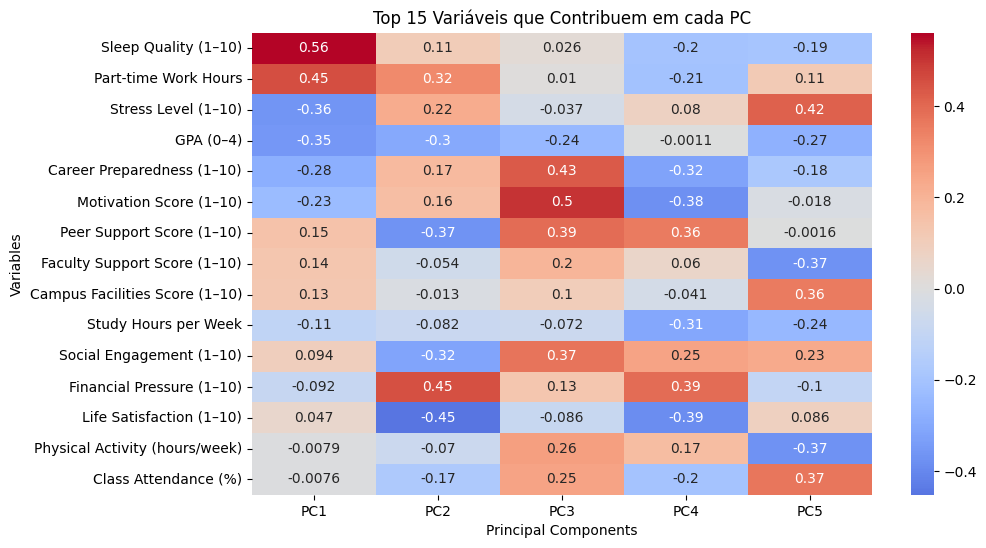

In [25]:
all_top_vars = list(dict.fromkeys(all_top_vars))
top_loadings = loadings.loc[all_top_vars]

plt.figure(figsize=(10,6))
sns.heatmap(top_loadings, annot=True, cmap="coolwarm", center=0)
plt.title(f"Top {top_n} Variáveis que Contribuem em cada PC")
plt.ylabel("Variables")
plt.xlabel("Principal Components")
plt.show()

A escolha do PC a utilizar dependerá do propósito a alcançar:
- PC1: Experiência geral de um aluno;
- PC2: Suporte externo no desempenho académico;
- PC3: Motivação e suporte académico
- PC4: Motivação e satisfação geral
- PC5: Stress e gestão de tempo de estudo


In [26]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.168687,-2.198631,0.409613,1.604818,1.517427
1,-1.532762,-0.190863,-1.675778,0.718941,-0.103057
2,0.707823,-0.682223,0.928383,-1.045687,-0.865186
3,0.304400,-0.843921,-0.051136,0.424484,-0.193829
4,-0.188330,-2.184975,-0.326021,-0.131790,-0.728089


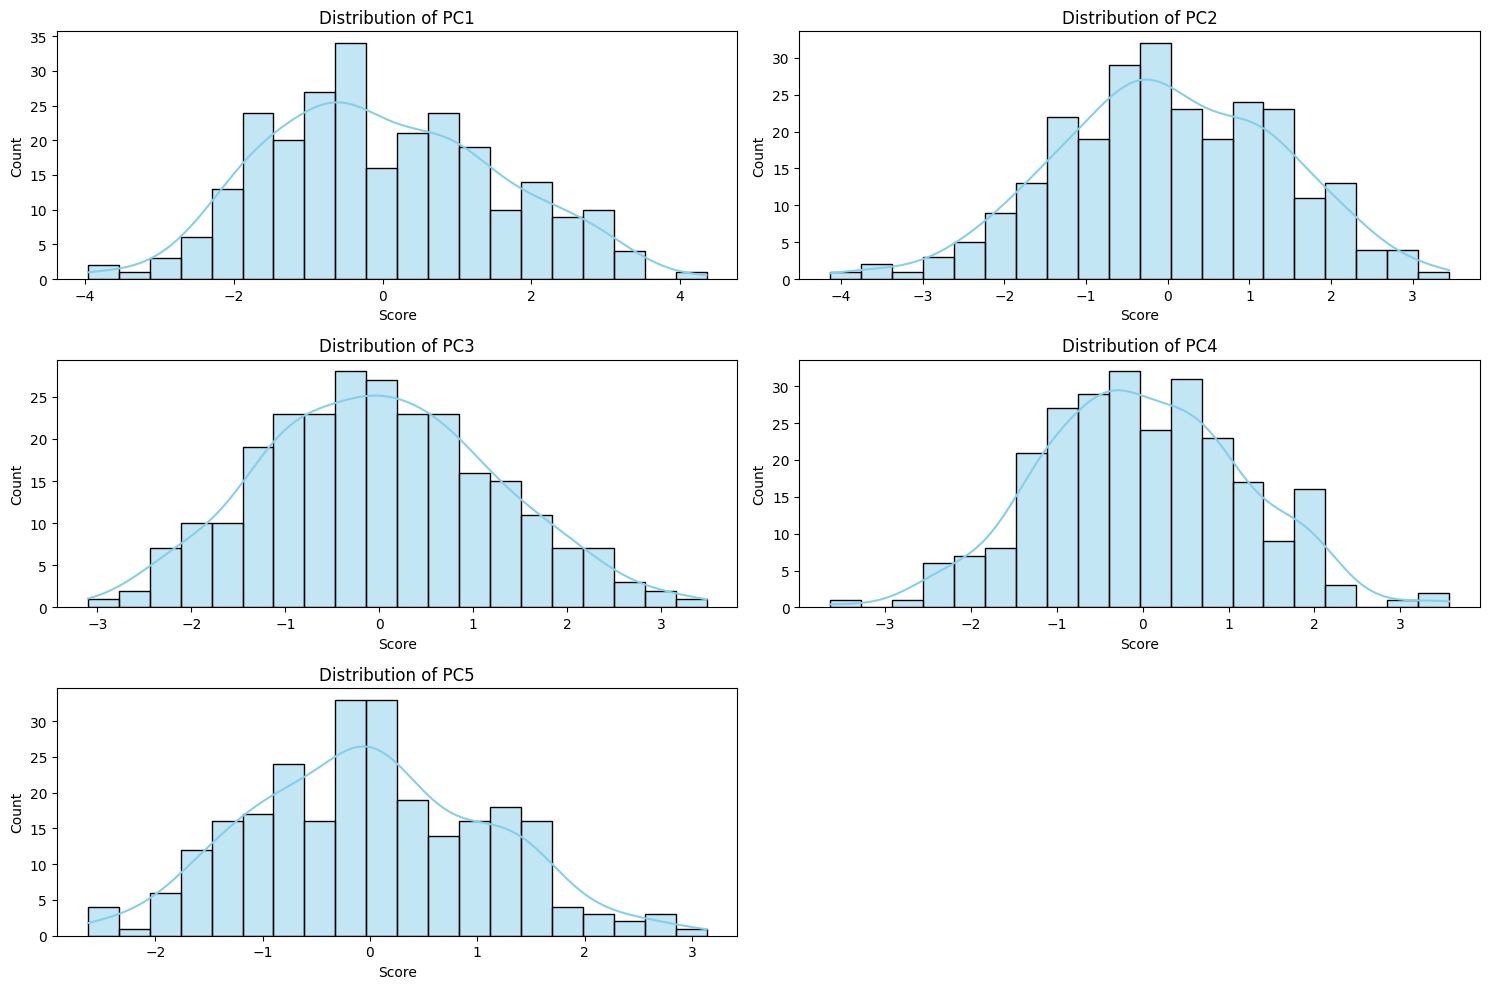

In [106]:
pcs = df_pca.columns
plt.figure(figsize=(15,10))

for i, pc in enumerate(pcs, 1):
    plt.subplot(3, 2, i)  # 3 rows x 2 columns layout
    sns.histplot(df_pca[pc], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {pc}')
    plt.xlabel('Score')
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()